<small><small><i>
All the IPython Notebooks in **Python Data Analytics Projects** lecture series by **[Dr. Milaan Parmar](https://www.linkedin.com/in/milaanparmar/)** are available @ **[GitHub](https://github.com/milaan9/93_Python_Data_Analytics_Projects)**
</i></small></small>

# Predicting COVID-19 from Chest X-Ray Images

### STEP 1: IMPORTING LIBRARIES

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data_dir = '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset' 
# data_dir = 'https://drive.google.com/drive/folders/1VhBKoycwZ6EC-DUaS0n17rDD7fvNW4mx?usp=sharing'
import tensorflow as tf
import cv2
import numpy as np
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
import os
%matplotlib inline

image_size = (150, 150)

import cv2
import imghdr
image_exts = ['jpeg','jpg', 'bmp', 'png']
image_class=['Not-Covid','COVID']
data_class = os.listdir(data_dir)


dataset = tf.keras.preprocessing.image_dataset_from_directory(
     data_dir,
     labels="inferred",
     label_mode="binary",
     class_names=None,
     color_mode="rgb",
     batch_size=30,
     image_size=image_size,
     shuffle=True,
     seed=40,
     validation_split=None,
     subset=None,
     interpolation="bilinear",
 )
 






Found 3000 files belonging to 2 classes.


### STEP 2: CLONING DATASET

In [ ]:
import os

main_dir = "/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset"

# SETTING TRAIN AND TEST DIRECTORY
# train_dir = os.path.join(main_dir, "train")
# test_dir = os.path.join(main_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(main_dir, "COVID")
train_normal_dir = os.path.join(main_dir, "Not-Covid")

# test_covid_dir = os.path.join(test_dir, "COVID19")
# test_normal_dir = os.path.join(test_dir, "NORMAL")


In [ ]:
# MAKING SEPERATE FILES : 
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

# test_covid_names = os.listdir(test_covid_dir)
# test_normal_names = os.listdir(test_normal_dir)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### STEP 3: PERFORMING DATA VISUALIZATION

['/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/COVID/COVID-1196.png', '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/COVID/COVID-1323.png', '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/COVID/COVID-1036.png', '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/COVID/COVID-1480.png', '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/COVID/COVID-1499.png', '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/COVID/COVID-1127.png', '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/COVID/COVID-1351.png', '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/COVID/COVID-123.png']
['/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/Not-Covid/Normal-13.png', '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/Not-Covid/Normal-357.png', '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/Not-Covid/Normal-148.png', '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset/Not-Covid/Normal-324.png', '/content/drive/MyDrive/AI/COVID-19_

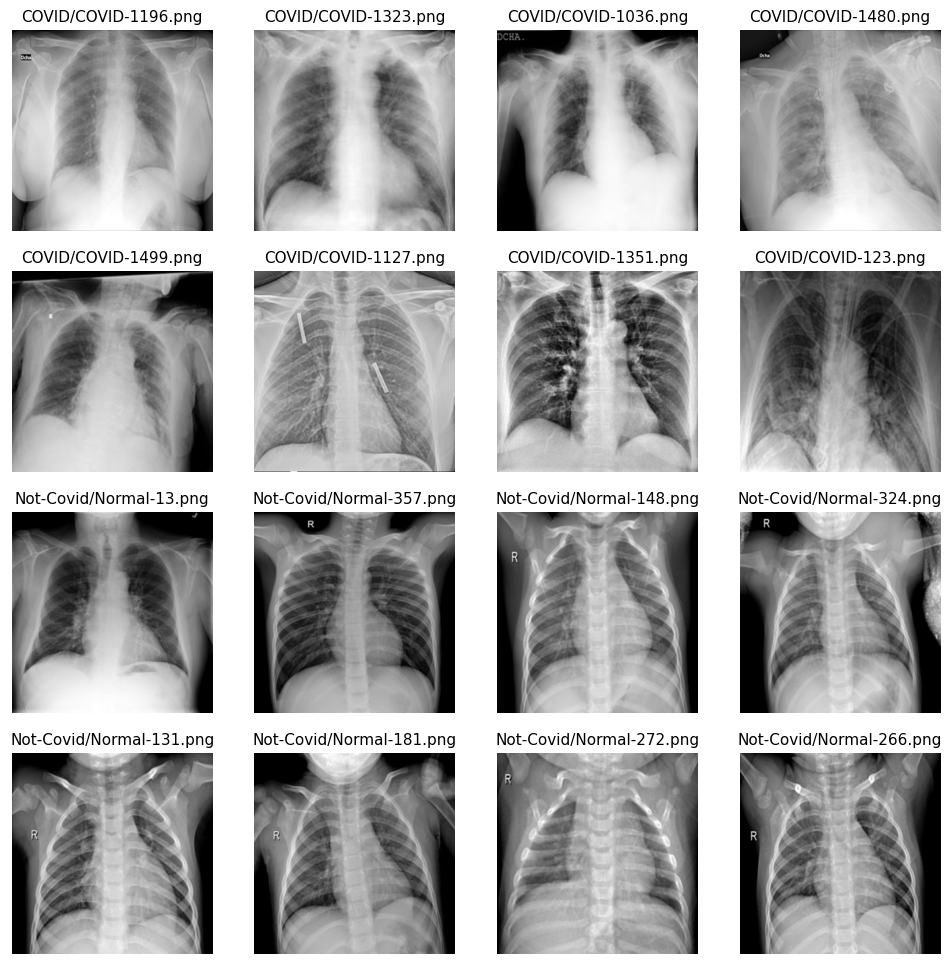

In [ ]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[6]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

# 4) DATA PREPROCESSING AND AUGMENTATION

In [ ]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(main_dir,
                                                 target_size = (200, 200), 
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(main_dir,
                                                      target_size = (200, 200), 
                                                      subset = "validation", 
                                                      batch_size = 32, 
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(main_dir,
                                               target_size = (200, 200), 
                                               batch_size = 32, 
                                               class_mode = "binary")




Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [ ]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID': 0, 'Not-Covid': 1}
Image shape is :  (200, 200, 3)


### STEP 5: BUILDING CONVOLUTIONAL NEURAL NETWORK MODEL

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 50, 50, 64)       

### STEP 6: COMPILING AND TRAINING THE NEURAL NETWORK MODEL

In [ ]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# TRAINING THE MODEL
history = model.fit(train_generator, 
                    epochs = 50, 
                    validation_data = validation_generator)

Epoch 1/50
75/75 [==============================] - 40s 499ms/step - loss: 1.0625 - accuracy: 0.7342 - val_loss: 0.6842 - val_accuracy: 0.5833
Epoch 2/50
75/75 [==============================] - 38s 504ms/step - loss: 0.4278 - accuracy: 0.8242 - val_loss: 0.6694 - val_accuracy: 0.5783
Epoch 3/50
75/75 [==============================] - 39s 528ms/step - loss: 0.4064 - accuracy: 0.8375 - val_loss: 0.7426 - val_accuracy: 0.5433
Epoch 4/50
75/75 [==============================] - 40s 528ms/step - loss: 0.3706 - accuracy: 0.8492 - val_loss: 0.6780 - val_accuracy: 0.6183
Epoch 5/50
75/75 [==============================] - 36s 480ms/step - loss: 0.3581 - accuracy: 0.8508 - val_loss: 0.6824 - val_accuracy: 0.5917
Epoch 6/50
75/75 [==============================] - 37s 486ms/step - loss: 0.3419 - accuracy: 0.8637 - val_loss: 0.6663 - val_accuracy: 0.5683
Epoch 7/50
75/75 [==============================] - 36s 486ms/step - loss: 0.3319 - accuracy: 0.8621 - val_loss: 0.6739 - val_accuracy: 0.5950

# 7) PERFORMING EVALUATION


In [ ]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

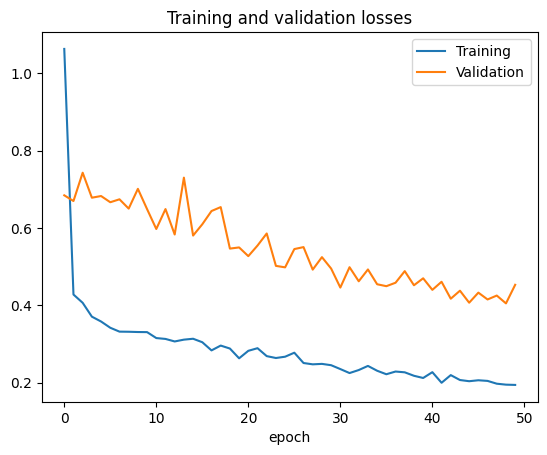

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

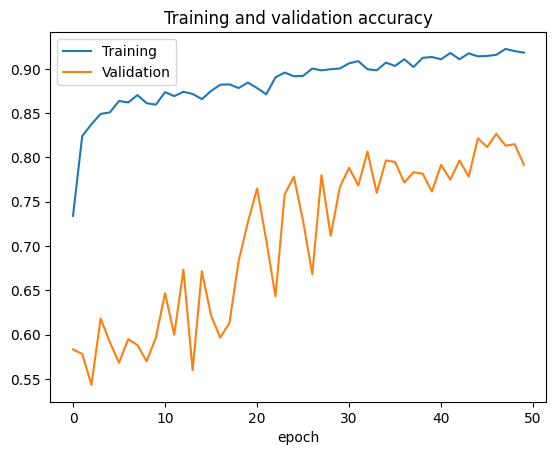

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [ ]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

94/94 [==============================] - 12s 123ms/step - loss: 0.2541 - accuracy: 0.8903
Test Set Loss :  0.25410324335098267
Test Set Accuracy :  0.890333354473114


### STEP 7: PREDICTION ON NEW DATA (UPLOAD FILES)

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)
  
  if prediction == 0:
    print("The report is COVID-19 Positive")
  else:
    print("The report is COVID-19 Negative")

In [ ]:
model.save("model.h5")